In [1]:
import pandas as pd
from helper import prepare_data, plot_decision_tree, plot_feature_importance
from decision_trees import DecisionTree
from random_forest import RandomForest
from svm import SupportVectorMachines
from knn import KNearestNeighbors
import time

from decision_trees import DecisionTree
from random_forest import RandomForest
from svm import SupportVectorMachines
from knn import KNearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
df_newhousing = pd.read_csv('newhousing.txt', delimiter=" ")

In [3]:
X_train, X_test, y_train, y_test = prepare_data(df_newhousing, target_column= 'pricelevel', split = True)

In [4]:
start_time = time.time()
decision_tree = DecisionTree(X_train, y_train)
print("--- %s seconds running decision tree tuning ---" % (time.time() - start_time))

start_time = time.time()
random_forest = RandomForest(X_train, y_train)
print("--- %s seconds running random forest tuning ---" % (time.time() - start_time))

start_time = time.time()
support_vector_machines = SupportVectorMachines(X_train, y_train)
print("--- %s seconds running SVM tuning ---" % (time.time() - start_time))

start_time = time.time()
k_nearest_neighbors = KNearestNeighbors(X_train, y_train)
print("--- %s seconds running KNN tuning ---" % (time.time() - start_time))

Fitting 5 folds for each of 2128 candidates, totalling 10640 fits
--- 9.955373525619507 seconds running decision tree tuning ---
Fitting 5 folds for each of 58 candidates, totalling 290 fits
--- 78.21375489234924 seconds running random forest tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
--- 0.14915943145751953 seconds running SVM tuning ---
Fitting 10 folds for each of 4263 candidates, totalling 42630 fits
--- 48.04946517944336 seconds running KNN tuning ---


### Comparison of models

In [5]:
df_compare = pd.DataFrame(columns = ['Model', 'train accuracy', 'test accuracy'])
df_compare = df_compare.append({'Model': 'decision tree', 'train accuracy': decision_tree.get_accuracy(X_train, y_train), 
                                 'test accuracy': decision_tree.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'random forest', 'train accuracy': random_forest.get_accuracy(X_train, y_train), 
                                 'test accuracy': random_forest.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'SVM', 'train accuracy': support_vector_machines.get_accuracy(X_train, y_train), 
                                 'test accuracy': support_vector_machines.get_accuracy(X_test, y_test)}, ignore_index=True)
df_compare = df_compare.append({'Model': 'KNN', 'train accuracy': k_nearest_neighbors.get_accuracy(X_train, y_train), 
                                 'test accuracy': k_nearest_neighbors.get_accuracy(X_test, y_test)}, ignore_index=True)

df_compare

,Model,train accuracy,test accuracy
0,decision tree,0.8675,0.783019
1,random forest,1.0000,0.849057
2,SVM,0.9525,0.792453
3,KNN,0.8800,0.773585


### Print decision Tree

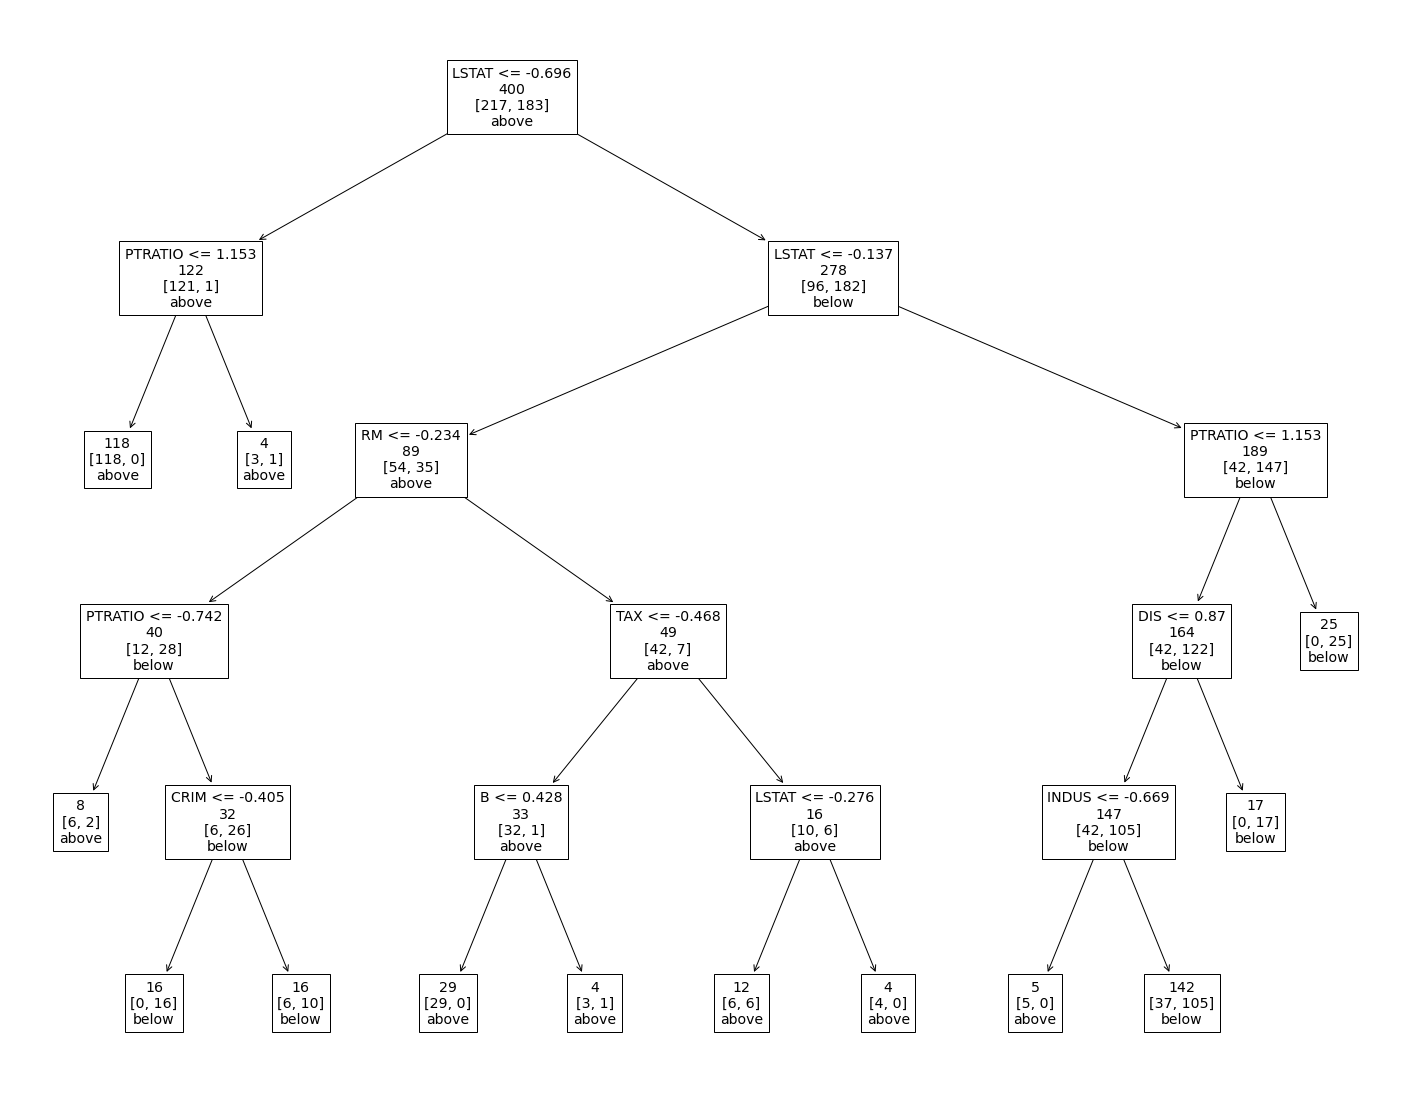

In [6]:
plot_decision_tree(classifier = decision_tree.best_model(), df = df_newhousing, target_name = 'pricelevel')

### Print feature importance

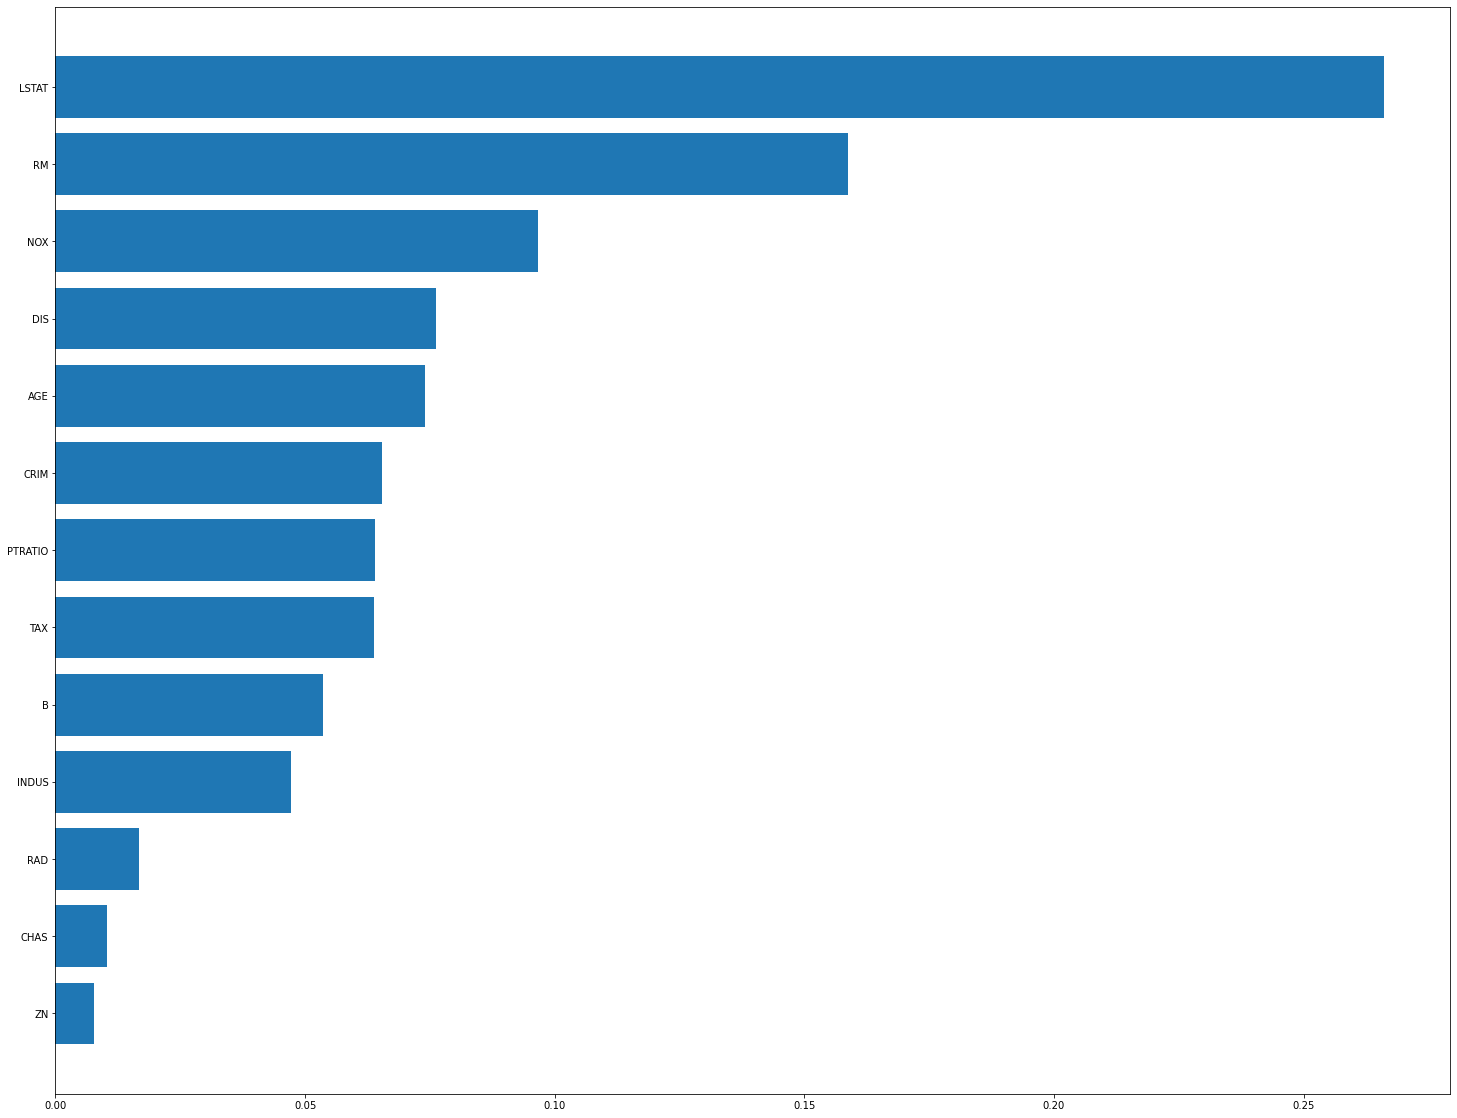

In [7]:
plot_feature_importance(classifier = random_forest.best_model(), df = df_newhousing, target_name = 'pricelevel')